# Machine-Learning

In [22]:
import numpy as np
import pandas as pd
from  matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

In [4]:
#data importation 
data_1 = pd.read_csv(r"/home/sid2019-22/Téléchargements/Dataset_complete.csv")
data_0 = pd.read_csv(r"/home/sid2019-22/Téléchargements/positions.csv")
extract_orientation = data_0[['node_id','orientation']]
extract_orientation.rename(columns={"node_id": "target"}, inplace=True)
data = data_1.merge(extract_orientation,how='left', on = 'target')

/home/sid2019-22/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [5]:
data.replace(- np.inf, -120,inplace=True)

In [6]:
data.drop('ranging_unit', axis=1, inplace=True)
data.drop('register_dump_CIR', axis=1, inplace=True)
data.drop('initiator', axis=1, inplace=True)
data.drop('protocol', axis=1, inplace=True)
data.drop('loc_initiator_z', axis=1, inplace=True)

## KNN

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

#### test descendant

In [8]:
for j in data.drop(['target','loc_initiator_y','loc_initiator_x'],axis = 1,inplace = False).columns:
    for i in data.drop(['target','loc_initiator_y','loc_initiator_x'],axis = 1,inplace = False).columns:
        if i != j :
            train,test = train_test_split(data.drop(['target',j,i],axis = 1,inplace = False), test_size=0.3, train_size=0.7, shuffle=True)
            y_train = train[['loc_initiator_x']]
            x_train = train.drop(["loc_initiator_x",'loc_initiator_y'], axis=1, inplace=False)

            y_test = test[['loc_initiator_x']]
            x_test = test.drop(["loc_initiator_x",'loc_initiator_y'], axis=1, inplace=False)
            knn = KNeighborsRegressor(n_neighbors = 6)
            knn.fit(x_train,y_train)
            prediction = knn.predict(x_test)
            a = knn.score(x_test,y_test)
            if a > 0 :
                print(knn.score(x_test,y_test),"sans les colonnes :",j,i)

In [9]:
mean_squared_error(y_test,prediction)

1.1703880269331832

### Test d'amélioration

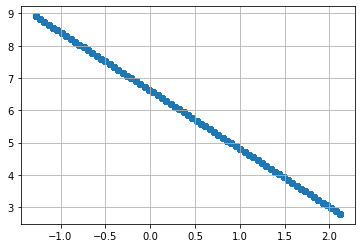

NameError: name 'slope' is not defined

In [10]:
from scipy import stats


def predict(y):
    return slope * y + intercept

X =  y_train #selection de la première colonne de notre dataset
Y =  train.loc_initiator_y

axes = plt.axes()
#axes.set_xlim([2, 25])
#axes.set_ylim([0, 30])
axes.grid()
plt.scatter(X,Y)
plt.show()
#plt.savefig("D:/figure.png")

#slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

fitLine = predict(X)
plt.plot(X, fitLine, c='r')

print(slope,intercept)

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(prediction,test['loc_initiator_y'],'*r')
plt.plot(data['loc_target_x'],data['loc_target_y'],"*b")
plt.xlabel("x location", fontsize=16)
plt.ylabel("y location", fontsize=16)
plt.title('Predictive positions of initiator (in red)', fontsize=20);

### test ascendant

In [ ]:
for j in data.drop(['target','loc_initiator_y','loc_initiator_x','timestamp'],axis = 1,inplace = False).columns:
    for i in data.drop(['target','loc_initiator_y','loc_initiator_x','timestamp'],axis = 1,inplace = False).columns:
        if i != j :
            train,test = train_test_split(data[[i,j,'loc_initiator_y','loc_initiator_x','target']], test_size=0.3, train_size=0.7, shuffle=True)
            y_train = train[['loc_initiator_x']]
            x_train = train.drop(["loc_initiator_x",'loc_initiator_y'], axis=1, inplace=False)

            y_test = test[['loc_initiator_x']]
            x_test = test.drop(["loc_initiator_x",'loc_initiator_y'], axis=1, inplace=False)
            knn = KNeighborsRegressor(n_neighbors = 6)
            knn.fit(x_train,y_train)
            prediction = knn.predict(x_test)
            a = knn.score(x_test,y_test)
            if a > 0.99999 :
                print(knn.score(x_test,y_test),"avec les colonnes :",j,i)

In [ ]:
train,test = train_test_split(data[['skew',"loc_initiator_x",'loc_initiator_y']],test_size=0.3, train_size=0.7, shuffle=True)


y_train = train[['loc_initiator_x']]
x_train = train.drop(["loc_initiator_x",'loc_initiator_y'], axis=1, inplace=False)

y_test = test[['loc_initiator_x']]
x_test = test.drop(["loc_initiator_x",'loc_initiator_y'], axis=1, inplace=False)
knn = KNeighborsRegressor(n_neighbors = 6)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
knn.score(x_test,y_test)

### test avec features

In [ ]:
l = []
for j in ['nlos_indicator','t1','t2','t3','t4','skew','tof','tof_skew','seqnum','rssi_request','rssi_ack','rssi_data','rssi_mean']:
    for i in ['nlos_indicator','t1','t2','t3','t4','skew','tof','tof_skew']:
        if i != j :
            train,test = train_test_split(data[[i,j,'loc_initiator_y','loc_initiator_x','target']], test_size=0.3, train_size=0.7, shuffle=True)
            y_train = train[['loc_initiator_x']]
            x_train = train.drop(["loc_initiator_x",'loc_initiator_y'], axis=1, inplace=False)

            y_test = test[['loc_initiator_x']]
            x_test = test.drop(["loc_initiator_x",'loc_initiator_y'], axis=1, inplace=False)
            knn = KNeighborsRegressor(n_neighbors = 6)
            knn.fit(x_train,y_train)
            prediction = knn.predict(x_test)
            a = knn.score(x_test,y_test)
            if a > 0.8 :
                print(knn.score(x_test,y_test),"with columns :",j,i)
                if i not in l:
                    l.append(i)
                if j not in l :
                    l.append(j)

In [ ]:
train,test = train_test_split(data[["loc_initiator_x",'loc_initiator_y','nlos_indicator','t1','t2','t3','t4','skew','tof','tof_skew','seqnum','rssi_request','rssi_ack','rssi_data','rssi_mean']], test_size=0.3, train_size=0.7, shuffle=True)
y_train = train[['loc_initiator_x']]
x_train = train.drop(["loc_initiator_x",'loc_initiator_y'], axis=1, inplace=False)


from sklearn.feature_selection import SequentialFeatureSelector
knn = KNeighborsRegressor(n_neighbors = 6)
seq = SequentialFeatureSelector(knn)
seq.fit(x_train, y_train)

In [ ]:
a = seq.get_support()
rep = []
for i in range(len(a)):
    if a[i]:
        rep.append(['nlos_indicator','t1','t2','t3','t4','skew','tof','tof_skew','seqnum','rssi_request','rssi_ack','rssi_data','rssi_mean'][i])

In [ ]:
train,test = train_test_split(data[["loc_initiator_x",'loc_initiator_y','nlos_indicator', 'skew', 'seqnum', 'rssi_ack', 'rssi_data', 'rssi_mean']], test_size=0.3, train_size=0.7, shuffle=True)
y_train = train[['loc_initiator_x']]
x_train = train.drop(["loc_initiator_x",'loc_initiator_y'], axis=1, inplace=False)

y_test = test[['loc_initiator_x']]
x_test = test.drop(["loc_initiator_x",'loc_initiator_y'], axis=1, inplace=False)
knn = KNeighborsRegressor(n_neighbors = 6)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
knn.score(x_test,y_test)

### test des meilleurs

In [ ]:
train_best,test_best = train_test_split(data[["loc_initiator_x",'loc_initiator_y','tof_skew', 'tof', 'nlos_indicator', 'seqnum', 'skew']], test_size=0.3, train_size=0.7, shuffle=True)
y_train = train[['loc_initiator_x']]
x_train = train.drop(["loc_initiator_x",'loc_initiator_y'], axis=1, inplace=False)

y_test = test[['loc_initiator_x']]
x_test = test.drop(["loc_initiator_x",'loc_initiator_y'], axis=1, inplace=False)
knn = KNeighborsRegressor(n_neighbors = 6)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
a = knn.score(x_test,y_test)
if a > 0.8 :
    print(knn.score(x_test,y_test))

### méthode ascendante en partant des meilleurs

In [ ]:
data_clear = data[["loc_initiator_x",'loc_initiator_y','nlos_indicator','t1','t2','t3','t4','skew','tof','tof_skew','seqnum','rssi_request','rssi_ack','rssi_data','rssi_mean']]

In [ ]:
data_eph = data[['seqnum', 'tof_skew', 'tof', 'nlos_indicator', 'skew','loc_initiator_x','loc_initiator_y']]
for col in data_clear.drop(['seqnum', 'tof_skew', 'tof', 'nlos_indicator', 'skew','loc_initiator_x','loc_initiator_y'],axis=1,inplace = False).columns:
    data_eph = pd.concat([data_eph,data_clear[col]],axis=1)
    train,test = train_test_split(data_eph , test_size=0.3, train_size=0.7, shuffle=True)

    y_train = train[['loc_initiator_x']]
    x_train = train.drop(['loc_initiator_x','loc_initiator_y'], axis=1, inplace=False)

    y_test = test[['loc_initiator_x']]
    x_test = test.drop(["loc_initiator_x",'loc_initiator_y'], axis=1, inplace=False)


    knn = KNeighborsRegressor(n_neighbors = 6)
    knn.fit(x_train,y_train)
    prediction = knn.predict(x_test)
    
    print(knn.score(x_test,y_test),"juste après avoir rajouté la colonne",col)

In [ ]:
train,test = train_test_split(data[["loc_initiator_x",'loc_initiator_y','nlos_indicator','t1','t2','t3','t4','skew','tof','tof_skew','seqnum','rssi_request','rssi_ack','rssi_data','rssi_mean']], test_size=0.3, train_size=0.7, shuffle=True)
y_train = train[['loc_initiator_x']]
x_train = train.drop(["loc_initiator_x",'loc_initiator_y'], axis=1, inplace=False)


from sklearn.feature_selection import SequentialFeatureSelector
knn = KNeighborsRegressor(n_neighbors = 6)
seq = SequentialFeatureSelector(knn)
seq.fit(x_train, y_train)

In [35]:
liste = []
for i in np.linspace(1,50,8):
    i = int(i)


    train,test = train_test_split(data[["loc_initiator_x",'loc_initiator_y','nlos_indicator', 'skew', 'seqnum', 'rssi_ack', 'rssi_data', 'rssi_mean']], test_size=0.3, train_size=0.7, shuffle=True)
    y_train = train[['loc_initiator_x']]
    x_train = train.drop(["loc_initiator_x",'loc_initiator_y'], axis=1, inplace=False)

    y_test = test[['loc_initiator_x']]
    x_test = test.drop(["loc_initiator_x",'loc_initiator_y'], axis=1, inplace=False)
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(x_train,y_train)
    prediction = knn.predict(x_test)
    liste.append(knn.score(x_test,y_test))

/home/sid2019-22/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

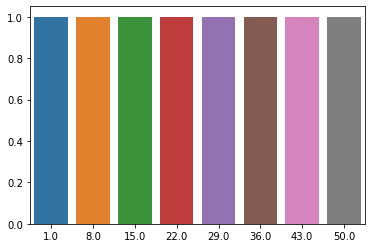

In [45]:
X = np.linspace(1,50,8)

sns.barplot(X,liste)

In [46]:
liste

[0.9999375372870496,
 0.9999062465579392,
 0.9998791783261691,
 0.9998444926076305,
 0.9998280578386695,
 0.9997976808155171,
 0.9997677126423636,
 0.9997338421223652]

In [47]:
data

,target,nlos_indicator,t1,t2,t3,t4,skew,tof,tof_skew,range,...,course_dist,temperature_initiator,temperature_target,timestamp,seqnum,rssi_request,rssi_ack,rssi_data,rssi_mean,orientation
0,100,2.783982,946218857614,946490292658,946594234510,946322802711,-2.368804,1622,1745.608935,7.607739,...,0.000000,30.980000,30.220001,1654929794228,4,-80.136574,-80.077130,-79.836296,-80.016667,270.0
1,100,2.920485,1009474709646,1009746235572,1009850439822,1009578917162,-1.045965,1633,1687.497019,7.659333,...,0.000000,30.980000,29.840002,1654929795219,10,-80.267769,-79.988684,-79.835720,-80.030724,270.0
2,100,2.536090,1072923068046,1073194681670,1073299179662,1073027569304,-0.799856,1633,1674.791667,7.659333,...,0.000000,30.980000,29.840002,1654929796210,16,-79.964310,-79.850138,-79.693502,-79.835983,270.0
3,100,2.857669,36731534990,37003232943,37107270798,36835576116,-0.984438,1635,1686.709409,7.668714,...,0.000000,30.980000,29.840002,1654929797201,22,-80.040833,-79.818313,-79.849525,-79.902890,270.0
4,100,2.263103,99923195534,100194974620,100298828942,100027053147,-0.769092,1645,1685.436774,7.715617,...,0.000000,30.980000,29.840002,1654929798190,28,-79.999908,-80.102552,-80.022316,-80.041592,270.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,184,3.075243,301428484750,302000434919,302102988430,301531040251,-9.382925,995,1476.125937,4.666893,...,6.999961,41.810001,46.939999,1654930833773,4231,-80.229179,-79.428015,-79.342829,-79.666674,119.0
3942,184,3.085177,375355600014,375928251294,376031194254,375458544956,-8.306196,991,1418.532184,4.648132,...,6.999961,41.525002,47.319996,1654930834930,4237,-80.196487,-79.576395,-79.985511,-79.919464,119.0
3943,184,2.674524,449294310542,449867663034,449970544782,449397194279,-8.952233,994,1455.010695,4.662203,...,6.999961,41.810001,46.939999,1654930836088,4243,-80.158638,-79.435472,-79.234453,-79.609521,119.0
3944,184,2.727551,523279420046,523853474064,523955982478,523381930458,-8.490778,999,1434.188082,4.685655,...,6.999961,41.240002,46.559998,1654930837246,4249,-80.229492,-79.554364,-79.599858,-79.794571,119.0
